In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)

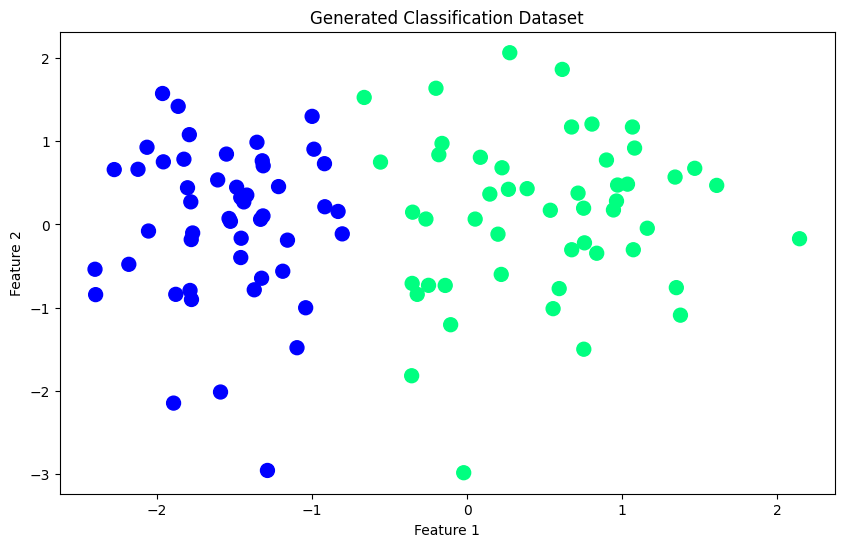

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.title("Generated Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:
def step(z):
    return 1 if z > 0 else 0


In [5]:
def perceptron(X, y):
    
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])  
    lr = 0.1  
    
    
    for i in range(1000):
        j = np.random.randint(0, X.shape[0])
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0], weights[1:]  


In [6]:
intercept_, coef_ = perceptron(X, y)
print("Weights (coefficients):", coef_)
print("Intercept:", intercept_)

Weights (coefficients): [1.44053854 0.13393398]
Intercept: 0.8


In [7]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b


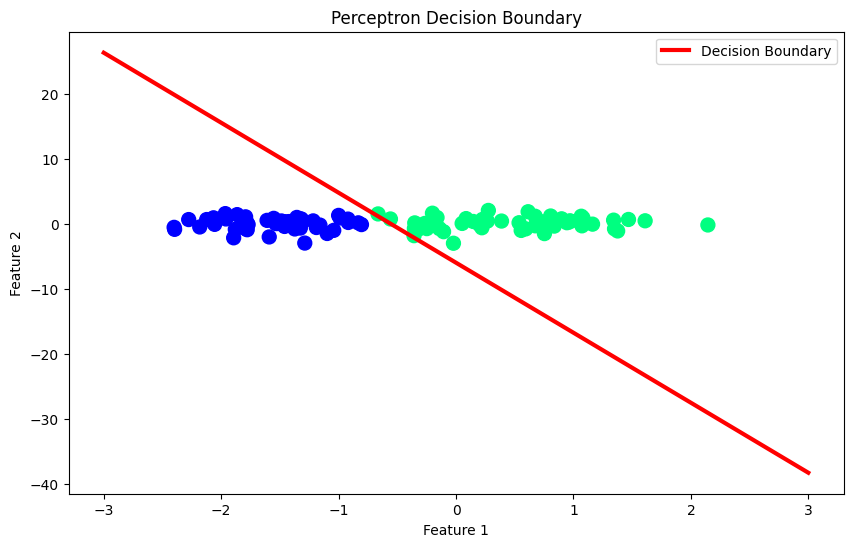

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3, label="Decision Boundary")
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()